In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nsmod
import os 
from numpy import cos, sin
%matplotlib inline

from nsmod.one_component_model_with_Euler import main
from nsmod import Plot, File_Functions, Physics_Functions

# Investigation of modelling the spin-down

## Simplistic spin-down only model

We take the model:

$$ \ddot{\Phi} = k \dot{\Phi} \sin^{2}\Theta $$

Then set $k=\frac{2R}{3c}$, $\dot{\Phi}=\Omega_{0}$ and use the expression for the modulation in $\Theta$ from Jones 2001:

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.3416407865e+14
DeltaPhi_49 : 1.7172104679e-03
DeltaPhi_49_SpindownTorque : 1.0715025101e-05
DeltaPhi_63 : 2.3950320849e-02
DeltaPhi_75 : 1.7214371745e-02
EMtorqueAmplificationfactor : 4.3816499746e+01
P : 1.0005072145e-03
T : 3.3000000000e+02
a0 : 4.0000000000e+00
beta : -6.9937225144e-04
chi0 : 8.8600000000e+01
delta_omega_dot0_EM : 4.3798229347e-03
delta_omega_dot0_FP : 6.7289684737e-06
delta_omega_dot0_FP_EM : 9.3850437638e-05
epsA : 5.0000000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-05
n : 1.0000000000e+05
nu_dot0 : -4.3772084811e-03
omega0 : 6.2800000000e+03
omega_dot0 : -2.7502812015e-02
source_script : one-component-model-with-Euler
tauA : 2.0010144290e+05
tauE : 2.2834028741e+05
tauP : 1.0005072145e+02
tauS : 2.2820398393e+05
wobble_angle : 7.0263807521e-02
wobble_angle_spindown : 4.3843109237e-04
BETA FUNCTION IS USED
BETA FUNCTION IS USED


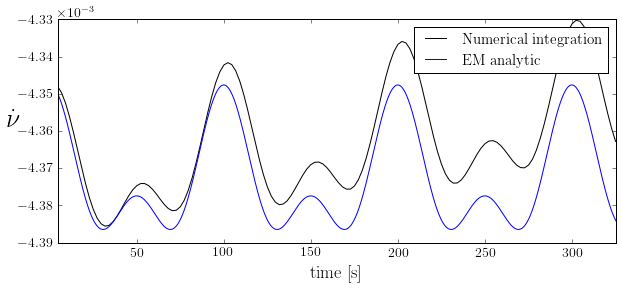

In [4]:
def SignalModel_001(theta1, t):
    omega0, epsI, a0, chi, epsA = theta1
    
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    
    omega = omega0
    
    psi = np.pi/2 - epsI*omega*t
    psidot = - epsI*omega 
    
    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = omega 
    
    return  -k * Phidot**3 * Sin2Theta / (2*np.pi)

fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameter3
epsI3 = 1e-5
omega0 = 2*np.pi*1000
epsA = 5e-9
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3.3* tauP
a0 = 4.0

n = 100000
error = 1e-13

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, 
                 cleanup=False, 
                 #DryRun=True, 
                 AnomTorque=True)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=11, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_001(theta_EM, time), color="b", label="EM analytic")

plt.legend()
plt.show()


Evidently it is lacking the spin-down. Let's include this

## Simplistic spin-down model with decay of $\Omega$. 

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 1.3416407865e+14
DeltaPhi_49 : 1.7172104679e-03
DeltaPhi_49_SpindownTorque : 1.0715025101e-05
DeltaPhi_63 : 2.3950320849e-02
DeltaPhi_75 : 1.7214371745e-02
EMtorqueAmplificationfactor : 4.3816499746e+01
P : 1.0005072145e-03
T : 3.3000000000e+02
a0 : 4.0000000000e+00
beta : -6.9937225144e-04
chi0 : 8.8600000000e+01
delta_omega_dot0_EM : 4.3798229347e-03
delta_omega_dot0_FP : 6.7289684737e-06
delta_omega_dot0_FP_EM : 9.3850437638e-05
epsA : 5.0000000000e-09
epsI1 : 0.0000000000e+00
epsI3 : 1.0000000000e-05
n : 1.0000000000e+05
nu_dot0 : -4.3772084811e-03
omega0 : 6.2800000000e+03
omega_dot0 : -2.7502812015e-02
source_script : one-component-model-with-Euler
tauA : 2.0010144290e+05
tauE : 2.2834028741e+05
tauP : 1.0005072145e+02
tauS : 2.2820398393e+05
wobble_angle : 7.0263807521e-02
wobble_angle_spindown : 4.3843109237e-04
BETA FUNCTION IS USED
BETA FUNCTION IS USED


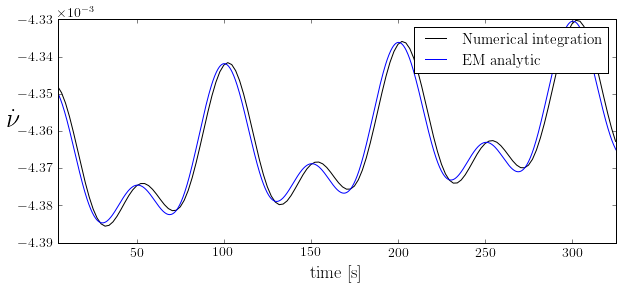

In [24]:
def SignalModel_002(theta1, t):
    omega0, epsI, a0, chi, epsA = theta1
    
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    
    omega = 1/np.sqrt(2*k*t + 1/omega0**2)
    
    psi = np.pi/2 - epsI*omega*t #+ .5*k*epsI*omega**3*t**2
    psidot = - epsI*omega #+ k*epsI*omega**3*t
    
    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = omega #- psidot * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
     #(sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)

    return  -k * Phidot**3 * Sin2Theta / (2*np.pi)

fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameter3
epsI3 = 1e-5
omega0 = 2*np.pi*1000
epsA = 5e-9
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3.3* tauP
a0 = 4.0

n = 100000
error = 1e-13

# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, 
                 cleanup=False, 
                 #DryRun=True, 
                 AnomTorque=True)

File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=11, label="Numerical integration")

time = np.linspace(0, T, 1000)

PD = File_Functions.Parameter_Dictionary(file_name)
nu_dot0 = PD['nu_dot0']

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_002(theta_EM, time), color="b", label="EM analytic")

plt.legend()
plt.show()

## In the B1828-11 limit:

Which this is not - it forces the double spindown behahviour

7.2708644734e-08


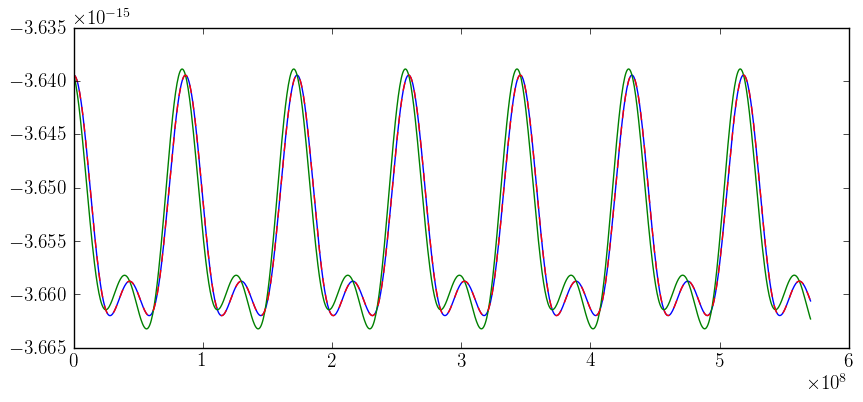

BETA FUNCTION IS USED
AnomTorque : 1.0000000000e+00
Bs : 9.9859901863e+11
DeltaPhi_49 : 3.9711699727e-02
DeltaPhi_49_SpindownTorque : -3.1239050432e-09
DeltaPhi_63 : 3.4430427755e-01
DeltaPhi_75 : 5.7229138543e+00
EMtorqueAmplificationfactor : 2.7237912161e+01
P : 4.0536679401e-01
T : 2.8500000000e+08
a0 : 3.1000000000e+00
beta : -8.9999917341e+01
chi0 : 8.8600000000e+01
delta_omega_dot0_EM : 3.6482322777e-15
delta_omega_dot0_FP : 6.9877923405e-18
delta_omega_dot0_FP_EM : 6.0584835450e-17
epsA : 2.7700000000e-13
epsI1 : 0.0000000000e+00
epsI3 : -4.6900000000e-09
n : 1.0000000000e+05
nu_dot0 : -3.6460545336e-15
omega0 : 1.5500000000e+01
omega_dot0 : -2.2908836274e-14
source_script : one-component-model-with-Euler
tauA : 1.4634180289e+12
tauE : 6.7659482194e+14
tauP : 8.6432152241e+07
tauS : 6.7619094130e+14
wobble_angle : 1.6248999631e+00
wobble_angle_spindown : -1.2782210846e-07


In [4]:
def SignalModel_EM2(theta1, t):
    omega0, epsI, a0, chi, epsA = theta1
    
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    
    omega = 1/np.sqrt(2*k*t + 1/omega0**2)
    
    psi = np.pi/2 - epsI*omega*t + .5*k*epsI*omega**3*t**2
    psidot = - epsI*omega + k*epsI*omega**3*t
    
    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = omega - psidot * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)
    
    T1 = -k * Phidot**3 * Sin2Theta / (2*np.pi)
    
    theta = a0
    print np.mean(psidot)
    GEOMETRIC = psidot**2 * ((2*sin(chi)**3*sin(psi)*sin(theta)*cos(theta) - 
                              sin(chi)**2*sin(psi)**2*sin(theta)**2*cos(chi) - 
                              2*sin(chi)**2*sin(theta)**2*cos(chi) + 
                              sin(chi)**2*cos(chi) - sin(theta)**2*cos(chi)**3
                             )*sin(chi)*sin(theta)*cos(psi)/(
                            (sin(chi)*sin(psi)*cos(theta) - sin(theta)*cos(chi))**2 + 
                             sin(chi)**2*cos(psi)**2)**2
                            )/ (2*np.pi)

    return T1 + GEOMETRIC

def SignalModel_002(theta1, t):
    omega0, epsI, a0, chi, epsA = theta1
    
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    
    omega = 1/np.sqrt(2*k*t + 1/omega0**2)
    
    psi = np.pi/2 - epsI*omega*t #+ .5*k*epsI*omega**3*t**2
    psidot = - epsI*omega #+ k*epsI*omega**3*t
    
    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = omega - psidot * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
     (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)

    return  -k * Phidot**3 * Sin2Theta / (2*np.pi)

def SignalModel_EMF(params, t):
    omega0, epsI, a0, chi, epsA = params
    
    theta = a0
    
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    
    psidot = -epsI*omega0
    psi = psidot*t + np.pi/2 
    C = 1 - (cos(theta)*cos(chi))**2 - 0.5*(sin(theta)*sin(chi))**2
    Phidot3 = (2*k*(C*t + 1.0/(psidot)*(.5*sin(2*theta)*sin(2*chi)*cos(psi) 
                                      - .25*(sin(theta)*sin(chi))**2*sin(2*psi)))
               + omega0**-2
               )**(-3./2)
    Sin2Theta = 1 - (sin(theta)*sin(psi)*sin(chi) + cos(theta)*cos(chi))**2
    
    return  -k * Phidot3 * Sin2Theta / (2*np.pi) 

fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameters
epsI3 = 9.37e-9 * -0.5
omega0 = 2*np.pi*2.47
epsA = 2.77e-13
chi0 = 88.6
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3.3* tauP
a0 = 3.1

n = 100000
error = 1e-13

time = np.linspace(0, 2*T, 1000)

# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_002(theta_EM, time), color="b", label="EM analytic")

#
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM2(theta_EM, time), color="g", label="EM analytic")

#
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EMF(theta_EM, time), color="r", ls="--", label="EM analytic")

plt.savefig("fig1.pdf")
plt.show()

file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, 
                 #cleanup=True, 
                 DryRun=True, 
                 AnomTorque=True)


File_Functions.PrintParameterDictionary(file_name)

## Messing about

BETA FUNCTION IS USED
1.521e+00
BETA FUNCTION IS USED
AnomTorque : 0.0000000000e+00
Bs : 1.8973665961e+14
DeltaPhi_49 : 1.6195681050e+00
DeltaPhi_49_SpindownTorque : -1.6981036810e-03
DeltaPhi_63 : 2.3293357339e+02
DeltaPhi_75 : 1.0042996932e+02
EMtorqueAmplificationfactor : 4.5183799353e+02
P : 2.5032610786e-03
T : 4.1200000000e+03
a0 : 6.0000000000e+00
beta : -8.9856809935e+01
chi0 : 4.5900000000e+01
delta_omega_dot0_EM : 5.5927934733e-04
delta_omega_dot0_FP : 2.5573492583e-06
delta_omega_dot0_FP_EM : 3.6780947915e-04
epsA : 1.0000000000e-08
epsI1 : 0.0000000000e+00
epsI3 : -2.0000000000e-06
n : 1.0000000000e+05
nu_dot0 : -2.8842336809e-04
omega0 : 2.5100000000e+03
omega_dot0 : -1.8122174686e-03
source_script : one-component-model-with-Euler
tauA : 2.5032610786e+05
tauE : 1.3850434859e+06
tauP : 1.2516305393e+03
tauS : 7.1427437660e+05
wobble_angle : 1.6712646368e+00
wobble_angle_spindown : -1.7523070644e-03
BETA FUNCTION IS USED


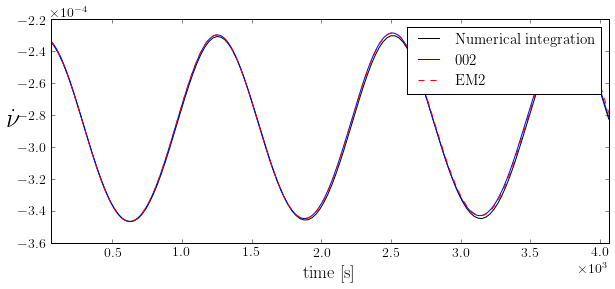

In [29]:
def SignalModel_EM20(theta1, t):
    omega0, epsI, a0, chi, epsA = theta1
    
    c = 3e10
    R = 1e6
    k = 2/3.0 * R/c * epsA
    
    omega = 1/np.sqrt(2*k*t + 1/omega0**2)
    
    psi = np.pi/2 - epsI*omega*t + .5*k*epsI*omega**3*t**2
    psidot = - epsI*omega + k*epsI*omega**3*t
    
    Sin2Theta = 1 - (sin(a0)*sin(psi)*sin(chi) + cos(a0)*cos(chi))**2
    Phidot = omega - psidot * sin(chi) * (cos(a0) *sin(chi) - sin(psi) * sin(a0) * cos(chi)) / (
                        (sin(a0)*cos(chi) - cos(a0)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)
    
    T1 = -k * Phidot**3 * Sin2Theta / (2*np.pi)
    
    theta = a0
    GEOMETRIC = psidot**2 * ((2*sin(chi)**3*sin(psi)*sin(theta)*cos(theta) - 
                              sin(chi)**2*sin(psi)**2*sin(theta)**2*cos(chi) - 
                              2*sin(chi)**2*sin(theta)**2*cos(chi) + 
                              sin(chi)**2*cos(chi) - sin(theta)**2*cos(chi)**3
                             )*sin(chi)*sin(theta)*cos(psi)/(
                            (sin(chi)*sin(psi)*cos(theta) - sin(theta)*cos(chi))**2 + 
                             sin(chi)**2*cos(psi)**2)**2
                            )/ (2*np.pi)

    return T1 + GEOMETRIC




fig, ax1 = plt.subplots(figsize=(10, 4))

# Parameter3
epsI3 = -2e-6
omega0 = 2*np.pi*400
epsA = 1e-8
chi0 = 45.9
tauP = 2 * np.pi/abs(epsI3 * omega0)
T = 3.3* tauP
a0 = 6.0

n = 100000
error = 1e-10



# Exact numerical result
file_name = main(chi0=chi0, epsI3=epsI3, epsA=epsA, omega0=omega0, T=T, 
                 n=n, error=error, a0=a0, 
                 cleanup=False, 
                 #DryRun=True, 
                 AnomTorque=False
                 )


PD = File_Functions.Parameter_Dictionary(file_name)
print "{:2.3e}".format(float(PD['delta_omega_dot0_EM'])/float(PD['delta_omega_dot0_FP_EM']))
File_Functions.PrintParameterDictionary(file_name)

ax1 = Plot.SpindownRate(file_name, ax=ax1, analytic="", divisor=11, label="Numerical integration")

time = np.linspace(0, T, 1000)



# EM model
theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_002(theta_EM, time), color="b", ls="-", label="002")

theta_EM = np.array([omega0, epsI3, np.radians(a0), np.radians(chi0), epsA])
ax1.plot(time, SignalModel_EM20(theta_EM, time), color="r", ls="--", label="EM2")

plt.legend()
plt.show()




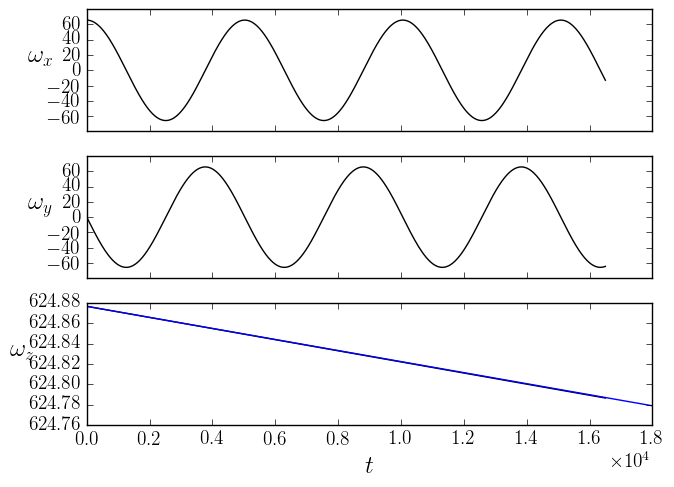

In [134]:
def wz(t, epsA, omega0, a0):
    R=1e6
    c=3e10
    wz0 = omega0*np.cos(np.radians(a0))
    return 1.0 / np.sqrt(4*R/(3*c) * epsA * t + wz0**-2)

time = np.linspace(0, 1.8e4)

axes = Plot.simple_plot(file_name)
axes[-1].plot(time, wz(time, epsA, omega0, a0))
plt.show()

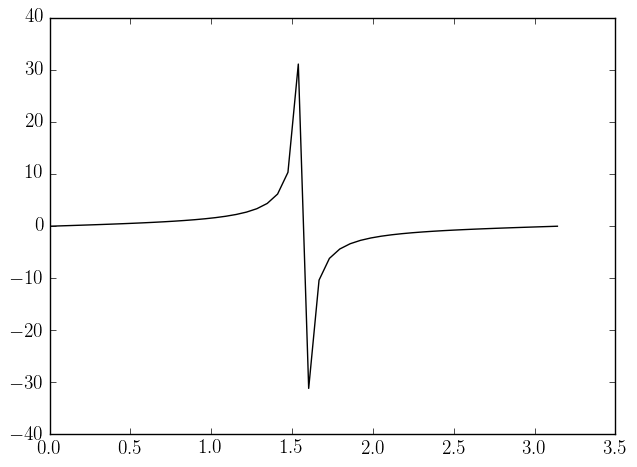

In [52]:
x = np.linspace(0, np.pi)
plt.plot(x, np.sin(x)/np.cos(x))
plt.show()

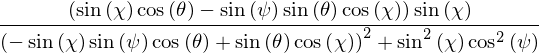

In [30]:
from sympy import *
init_printing()
theta, psi, chi = symbols('theta psi chi')

f = sin(chi) * (cos(theta)*sin(chi) - sin(psi)*sin(theta) * cos(chi))/(
    (sin(theta)*cos(chi) - cos(theta)*sin(psi)*sin(chi))**2 + (cos(psi) * sin(chi))**2)

f

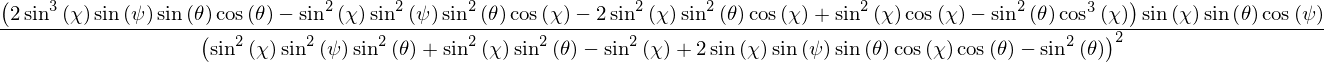

In [38]:
dfdp = diff(f, psi).trigsimp().powsimp()
dfdp

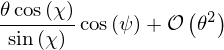

In [37]:
series(dfdp, theta, n=2)

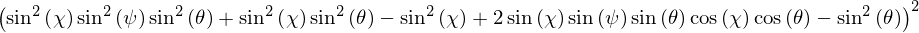

In [39]:
_, b = dfdp.as_numer_denom()
b

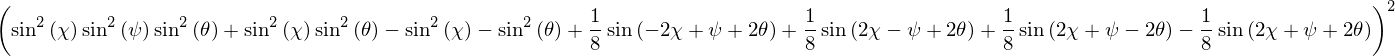

In [41]:
b.simplify()